<a href="https://colab.research.google.com/github/seulgiKim95/WordCloud/blob/main/rocket_punch_search_(1)22/07/15/17%3A40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 크롤링

## 필요한 라이브러리
* beautifulsoup4 (설치 필요) : html 코드 분석에 사용
* selenium (설치 필요) : 동적 사이트에서 html 추출하기 위해 사용
* time : 동적 사이트 로딩 시간을 기다리기 위해 사용

먼저 환경에 사용할 라이브러리를 설치 해줍니다.  
한 번 설치하면 다시 설치할 필요가 없으므로 설치 한 후에는 주석처리를 해줍니다.  
※ 보통 패키지를 설치할 때 pip install 명령어를 사용하지만 가끔 syntax error가 나면 pip 앞에 !를 붙여서 !pip install을 사용하면 해결될 때가 있습니다.

In [1]:
## 필요한 외부 라이브러리 install

# !pip install beautifulsoup4
# !pip install selenium
# !apt-get update
# !apt install chromium-chromedriver
# !cp /usr/lib/chromium-browser/chromedriver /usr/bin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 7.6 MB/s 
     |████████████████████████████████| 139 kB 72.9 MB/s 
     |████████████████████████████████| 358 kB 45.0 MB/s 
     |████████████████████████████████| 4.1 MB 45.3 MB/s 
     |████████████████████████████████| 55 kB 5.0 MB/s 
     |████████████████████████████████| 58 kB 6.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.10 which is incompatible.
datasci

라이브러리들을 import 합니다.

In [2]:
## 필요한 라이브러리 import

# -*- coding: UTF-8 -*-
import time
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time

## colab에서 selenium 사용
아래 코드는 colab에서 selenium을 사용하기 위한 코드입니다.  
웹드라이버를 옵션 값들을 설정해주고 웹드라이버를 driver 변수에 할당해주고 사용합시다.  
관련 옵션들에 대해 자세히 알고싶으신 분들은 [여기](https://codingstep.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%85%80%EB%A0%88%EB%8B%88%EC%9B%80-%ED%81%AC%EB%A1%AC-%EC%98%B5%EC%85%98-python-selenium-chrome-optionsFeat-headless-window-size-user-agent-etc)에서 확인해보시면 됩니다!

In [3]:
## 출처
## https://pgh268400.tistory.com/286

## Colab에선 웹브라우저 창이 뜨지 않으므로 별도 설정한다.
options = webdriver.ChromeOptions()
options.add_argument('--headless')        ## Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)

## url 변수에 사이트 주소 저장
이 부분은 각자 맡으신 사이트 주소 보고 각자 코드가 잘 돌아가도록 바꾸시면 됩니다.  
  
base_url에는 사이트 메인 주소를 넣어주고  
data_scientist에는 검색할 검색어를 넣어줍니다.


In [4]:
base_url = "https://www.wanted.co.kr/"
data_scientist = "데이터 사이언티스트"

## selenium 웹드라이버 이용한 검색
위에 저장해 둔 url로 접속하여 검색어 창에 원하는 검색어(여기서는 data_scientist 변수에 있는 "데이터 사이언티스트"가 검색어)를 입력하고 엔터를 칩니다.(Keys.ENTER)  
크롤링 하려는 페이지가 동적 페이지 이므로 검색 후 로딩되는 시간을 기다려 주기위해 time 라이브러리의 sleep 함수를 이용해줍니다.(각 사이트마다 걸리는 시간이 다를겁니다. 검색 결과가 나올정도로만 시간을 주시면 됩니다. sleep 함수의 단위는 초 입니다.)  
driver의 page_source 속성에 들어있는 html 코드를 html 변수에 저장해줍니다.
************************************

driver.get(base_url)을 하면 웹드라이버를 이용해 사이트에 접속을 하게 됩니다.  
화면에 보이진 않지만 크롬 주소창에 base_url에 들어있는 주소를 입력하고 들어간 것과 같은 상황입니다.  
  
직무를 검색하기 위해서는 아래의 검색창에 직무를 입력해야합니다.  
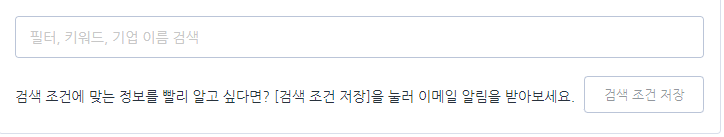  
search_job = driver.find_element('xpath','검색창의 xpath')를 하시면 html에서 해당하는 xpath 위치를 찾아 search_job에 저장합니다.  
저희는 검색을 하기 위해 검색창의 xpath가 필요하므로 사이트에서 F12를 눌러 검색창에 해당하는 xpath를 찾아줍시다.  
F12를 누르면 개발자 도구 창이 열리는데 거기서 image.png 이렇게 생긴 버튼을 누르고 사이트에서 찾고싶은 위치를 클릭하시면 html코드에서 해당 위치의 코드가 나타납니다.  
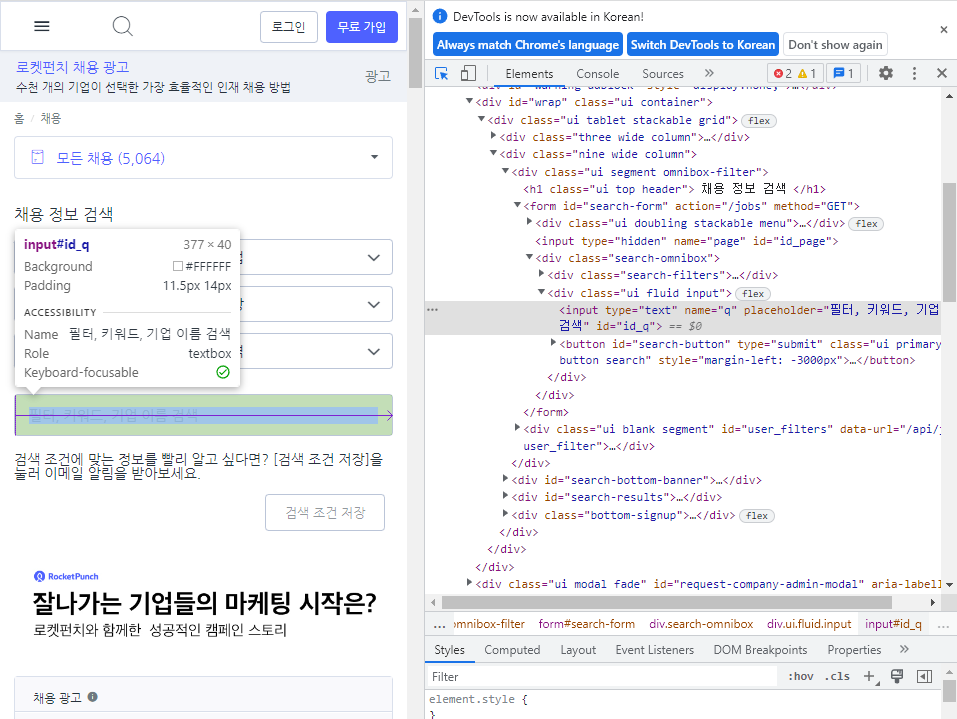  
해당하는 코드에서 왼쪽의 ... 버튼을 누르거나 오른쪽 마우스를 클릭한 뒤 Copy에서 Copy XPath를 누르시면 해당 코드의 xpath가 복사됩니다.  
```python
search_job = driver.find_element('xpath','여기!')
```  
복사한 xpath를 여기!에 넣어주세요.

```python
search_job.send_keys(data_scientist+Keys.ENTER)
```  
위 코드는 아까 정해준 검색어가 들어있는 data_scientist와 키보드의 enter키를 넘겨주는 코드입니다.  
검색창에 검색어와 enter키를 입력하기 위해 아까 검색창 정보를 저장해 둔 search_job에 data_scientist와 enter를 전달해줍니다.  
  
동적 사이트이므로 검색어를 입력한 후 결과가 나올 때 까지 기다려주기 위해 time의 sleep 함수를 사용합니다.  
sleep 함수의 단위는 초 이므로 여기서는 5초를 기다립니다.  

이제 driver에 있는 페이지 소스를 html 변수에 담아주고 driver는 반드시 quit()을 이용해 닫아줍니다.

In [8]:
## 해당 url로 이동
driver = webdriver.Chrome('chromedriver', options=options)
driver.get(base_url)

## 사이트에서 검색어 입력 부분(검색어 창)을 찾아 xpath로 넣어 찾아준다.
driver.find_element('xpath','//*[@id="__next"]/div[1]/div/nav/aside/ul/li[1]/button').send_keys(Keys.ENTER)
search_job = driver.find_element('xpath','//*[@id="__next"]/div[1]/div[2]/div/form/input')
## 찾은 검색어 창에 검색어를 입력하고 enter를 친다.
search_job.send_keys(data_scientist+Keys.ENTER)

## 페이지가 로딩 되는 동안 기다려준다.(여기서는 5초)
time.sleep(5)

## 페이지 소스를 html 변수에 저장하고 driver를 닫아준다.
html = driver.page_source
driver.quit()

## BeautifulSoup를 이용한 요소 검색
BeautifulSoup는 html 등의 요소를 편하게 검색할 수 있도록 도와주는 툴입니다.  
저희가 분석할 코드는 html 코드이므로 'html.parser'로 html을 BeautifulSoup 객체로 만들어 page_soup에 넣어준 뒤 확인 해봅시다.

In [9]:
## 페이지 소스를 beautifulsoup 객체로 만들어준다.
page_soup = BeautifulSoup(html, 'html.parser')

In [10]:
page_soup

<html class="ko kr" lang="ko-KR"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1.0, user-scalable=no" name="viewport"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="no-store" http-equiv="cache-control"/><meta content="website" property="og:type"/><meta content="ko_KR" property="og:locale"/><meta content="316787678519888" property="fb:app_id"/><meta content="#ffffff" name="theme-color"/><meta content="app-id=com.wanted.android.wanted" name="google-play-app"/><meta content="app-id=1074569961" name="apple-itunes-app"/><meta content="#ffffff" name="msapplication-TileColor"/><meta content="//static.wanted.co.kr/favicon/144x144.png" name="msapplication-TileImage"/><meta content="ef4f7f8504106401fe915b922514a5b352f59ca2" name="naver-site-verification"/><meta content="KEXLzgQBOVNqw8uNBWOXYOz2L4vUApbKxqxV6twdkxQ" name="google-site-verification"/><title>데이터 사이언티스트 | 원티드 통합검색</title><meta content="https://static.wanted.co.kr/images/facebook_i

여기까지 가져온 html이 채용 사이트에서 직무를 검색했을 때 검색 결과가 나온 상태의 html입니다.  
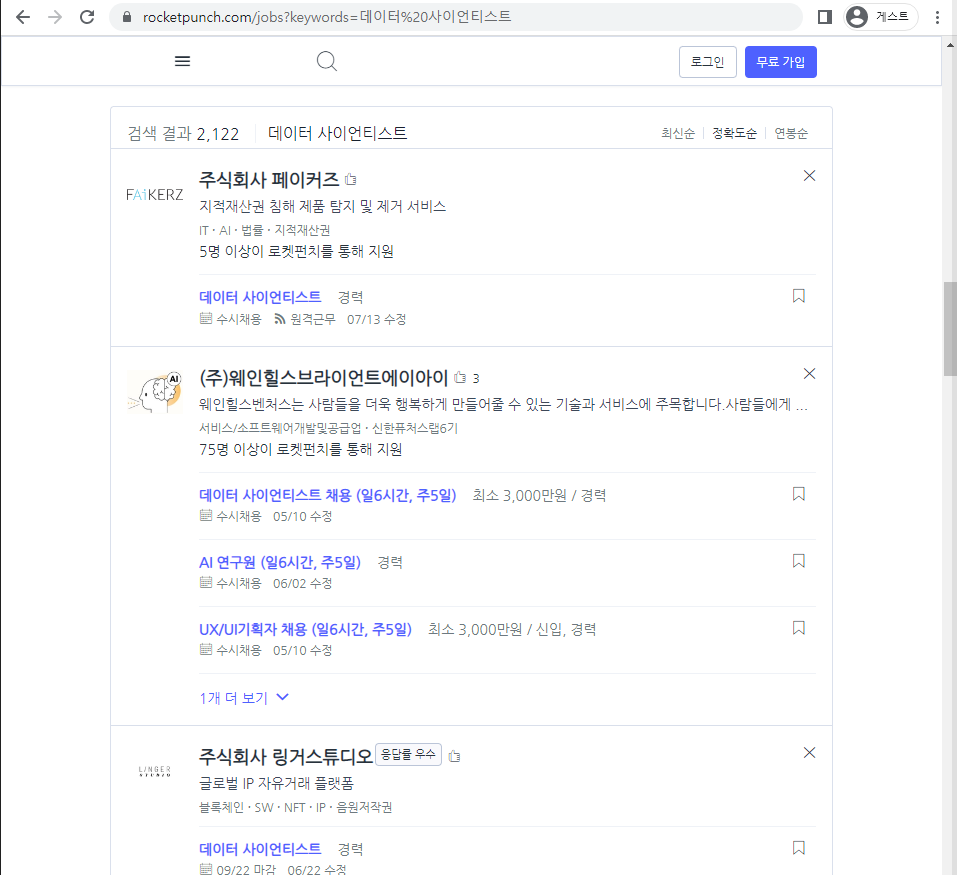  
(↑이 상태)  
  

  

이제 검색 결과로 가져온 html에서 필요한 정보를 찾아내면 됩니다.  
  
먼저 필요한 정보가 무엇인지 알아보겠습니다.  
  
저희는 각 직무의 필요 스킬/기술을 알아내는 것이 목표입니다.  
각 사이트마다 그 위치나 형태가 다른데 제가 한 rocketpunch 사이트의 경우는 검색 결과 나온 회사의 링크를 들어가면 관련 기술이 정리되어 있습니다.  
그럼 그 관련 기술을 확인하기 위해서는 회사의 링크로 들어간 페이지를 다시 크롤링 해와야하는데 그 페이지를 크롤링 하기 위해 필요한 정보를 찾아보겠습니다.  
(만약 selenium에 익숙하거나 그 방법이 더 효율적으로 보인다면 selenium으로 관련 기술이 있는 페이지까지 들어가서 그 소스를 가져오는 방법도 있을 것 같습니다.)  
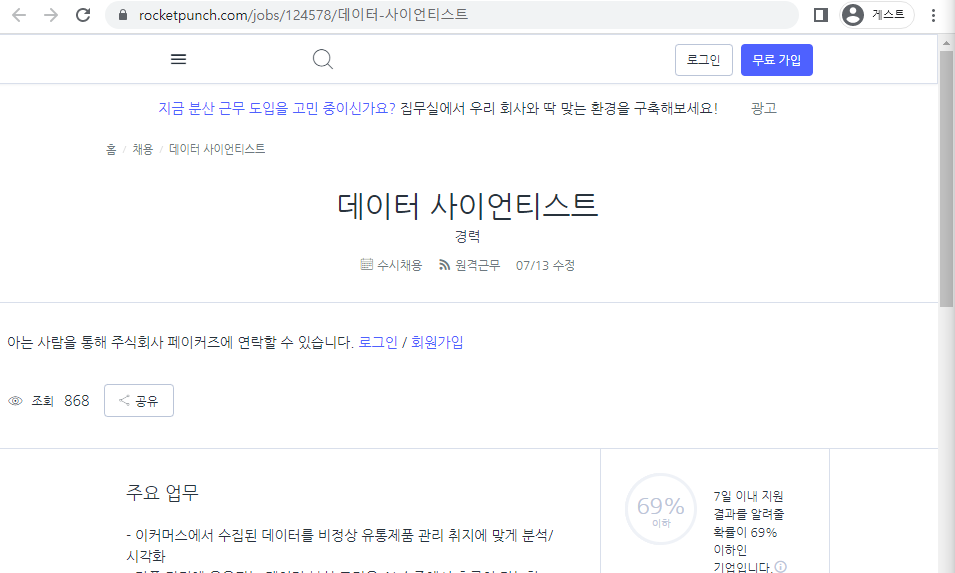  
검색 결과로 나온 회사의 링크로 들어간 화면입니다.  
이 링크의 주소를 보시면 아까 base_url로 정한 "https://www.rocketpunch.com/jobs" 뒤에 다른 정보가 더 들어있는데 이 정보가 검색 결과 창에 있을겁니다.  
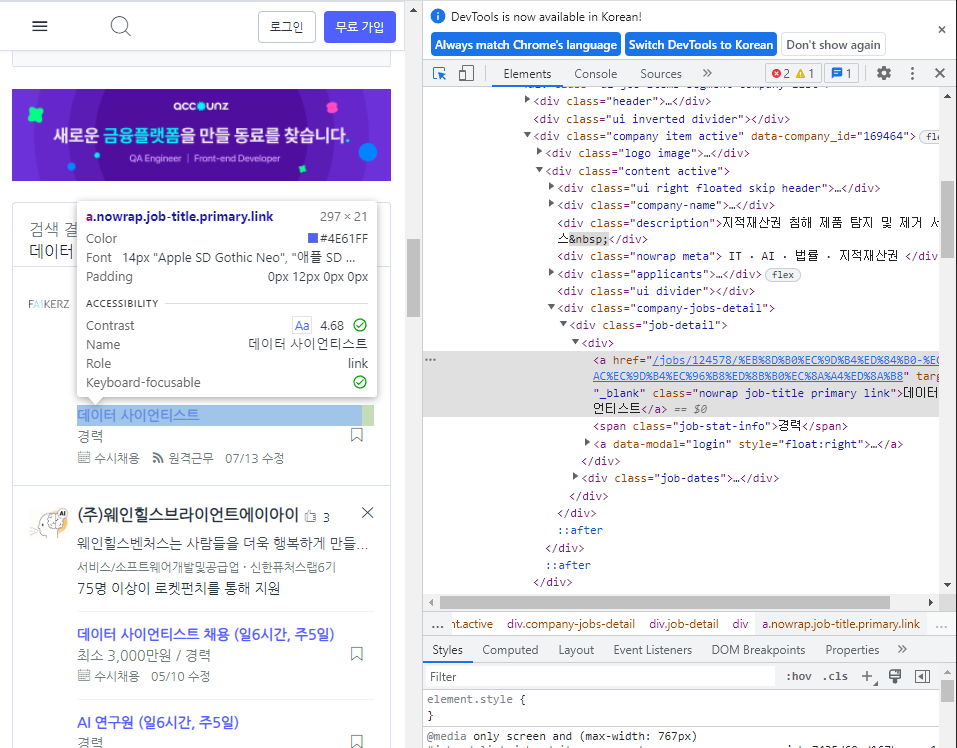  
보시는 것 처럼 링크를 타고 들어올 때 클릭했던 곳의 html을 확인해보시면 a태그의 href 부분에 주소의 일부분이 들어있는 것을 보실 수 있습니다.  
따라서 제가 한 rocketpunch 사이트에서 제가 필요한 부분은 각 회사의 저 부분들이 됩니다.

이런 정보들을 쉽게 찾기 위해 BeautifulSoup 객체에는 find_all() 메소드가 있는데 find_all() 메소드는 태그와 id, class 이름 등으로 html 요소를 검색하여 해당하는 모든 요소를 리스트 형태로 리턴해주는 메소드입니다.  
BeautifulSoup에 대해 더 궁금하신 분들은 [여기](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)를 클릭하셔서 BeautifulSoup 다큐먼트를 읽어보시면 됩니다.(하지만 저는 이 문서가 친절하지 않다고 느껴져 그냥 구글에 사용할 메소드를 검색해서 찾아봅니다. 친절한 글들이 많아요!)

In [13]:
## 우리가 필요한 데이터가 있는 곳의 태그와 class 이름을 찾아서 모두 찾아준다.
data_scientist_result = page_soup.find_all('a',{'aria-label':'position link'})
data_scientist_result

[<a aria-label="position link" class="" data-ai-score="" data-ai-score-status="" data-attribute-id="position__click" data-company-id="11142" data-company-name="모빅랩" data-job-category="IT" data-job-category-id="518" data-position-id="90328" data-position-name="데이터 사이언티스트" data-recommend-model-index="0" data-recommend-model-status="notBase" data-response-level="very_high" data-response-rate="100" href="/wd/90328"><header style='background-image: url("https://image.wanted.co.kr/optimize?src=https://static.wanted.co.kr/images/company/11142/0y3inbi2zze5unqx__400_400.jpg&amp;w=400&amp;q=75");'><button aria-label="bookmark button" class="bookmarkBtn" data-attribute-id="position__bookmark__click" data-company-id="11142" data-company-name="모빅랩" data-job-category="IT" data-job-category-id="518" data-kind="add" data-position-id="90328" data-position-name="데이터 사이언티스트" type="button"><svg fill="none" height="22" viewbox="0 0 18 18" width="22" xmlns="https://www.w3.org/2000/svg"><path clip-rule="even

이렇게 하시면 data_scientist_result에 저희가 찾은 태그를 포함한 전체 요소가 각각 들어있는 list가 생기는데  
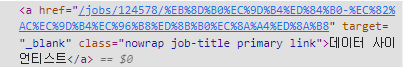  
아마 이런 애들이 저장될 것입니다.  
여기서 저희가 필요한 부분은 href=뒤에 있는 부분이므로 for 문을 이용해 필요한 부분만 data_scientist_list에 담아봅시다.

In [14]:
data_scientist_list = []
for i in data_scientist_result:
  if data_scientist in i.text:
    ## 찾은 태그가 포함된 소스에서 href 내용만 가져와서 list에 추가해준다.
    data_scientist_list.append(i['href'])

In [15]:
data_scientist_list

['/wd/90328',
 '/wd/99708',
 '/wd/97792',
 '/wd/112508',
 '/wd/88616',
 '/wd/63936',
 '/wd/107985',
 '/wd/107987',
 '/wd/63260',
 '/wd/57426',
 '/wd/107991',
 '/wd/107990',
 '/wd/79369',
 '/wd/99198',
 '/wd/83198',
 '/wd/40112',
 '/wd/75057',
 '/wd/82453',
 '/wd/60310',
 '/wd/77659']

In [16]:
import requests

r = requests.get('https://www.wanted.co.kr/wd/90328')
bs = BeautifulSoup(r.text,'html.parser')

In [41]:
skill = str(bs).split('자격요건')[1].split('\\n\\n')[0]

In [61]:
bs.find_all('h6')

[]

In [49]:
string = '\t'.join(['모빅랩',skill,'복지'])+'\n'

In [50]:
string

'모빅랩\t\\n• 경력 : 경력 5년 이상(면접 후 결정)\\n• SQL, Python, R 등 통계/분석 프로그램 활용 가능한 분\\n• 다양한 데이터에서 Insight를 찾아내는 능력 갖추신 분\\n• 딥러닝/머신러닝 등 모델링에 활용하는 언어 및 도구 하나 이상 활용 가능한 분\\n• 딥러닝/머신러닝에 대한 기본 지식을 보유하여 AI 엔지니어와 원활한 협업 가능하신 분\\n• 데이터 분석, 파이프라인 및 데이터 기반 서비스 관련 업무 경험 보유하신 분\\n• 원활하고 명확한 커뮤니케이션 및 매끄러운 문서 작성 능력이 있으신 분\t복지'

In [55]:
with open('company.txt','a') as f:
  f.write(string)

In [54]:
import pandas as pd

pd.read_csv('company.txt',sep='\t')

,회사이름,자격요건,복지
0,모빅랩,"\n• 경력 : 경력 5년 이상(면접 후 결정)\n• SQL, Python, R 등...",복지


In [56]:
driver = webdriver.Chrome('chromedriver', options=options)
driver.get('https://www.wanted.co.kr/wd/90328')
h = driver.page_source
driver.quit()

In [59]:
b = BeautifulSoup(h,'html.parser')

In [62]:
str(b).split('자격요건')[1].split('/p')[0]

'</h6><p><span>• 경력 : 경력 5년 이상(면접 후 결정)<br/>• SQL, Python, R 등 통계/분석 프로그램 활용 가능한 분<br/>• 다양한 데이터에서 Insight를 찾아내는 능력 갖추신 분<br/>• 딥러닝/머신러닝 등 모델링에 활용하는 언어 및 도구 하나 이상 활용 가능한 분<br/>• 딥러닝/머신러닝에 대한 기본 지식을 보유하여 AI 엔지니어와 원활한 협업 가능하신 분<br/>• 데이터 분석, 파이프라인 및 데이터 기반 서비스 관련 업무 경험 보유하신 분<br/>• 원활하고 명확한 커뮤니케이션 및 매끄러운 문서 작성 능력이 있으신 분</span><'